In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [6]:

# Read data

diamonds = pd.read_csv('diamonds.csv')

# turn to pandas dataframe
diamonds = pd.DataFrame(diamonds)
# info
display(diamonds.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


None

In [7]:
# some of our columns contain byte strings, we'll need to convert them to strings.
# we'll also need to convert the categorical features to strings.
diamonds['cut'] = diamonds['cut'].astype(str)
diamonds['color'] = diamonds['color'].astype(str)
diamonds['clarity'] = diamonds['clarity'].astype(str)

# fix byte strings
diamonds['cut'] = diamonds['cut'].str.replace("b'", '')
diamonds['cut'] = diamonds['cut'].str.replace("'", '')
diamonds['color'] = diamonds['color'].str.replace("b'", '')
diamonds['color'] = diamonds['color'].str.replace("'", '')
diamonds['clarity'] = diamonds['clarity'].str.replace("b'", '')
diamonds['clarity'] = diamonds['clarity'].str.replace("'", '')

# Business Question: 
# How do the physical attributes and quality grades of a diamond relate to its market price, 
# can we accurately predict the price of a diamond based on these features?"

so we have 10 columns ; 8 numeric and 2 categorical. [carat, depth, table, price, x, y, z] are numeric and [cut, color, clarity] are categorical.

# General Notes:
**on clarity feature: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)**

 **the table, x y and z imply the dimensions of the diamond**

**the depth is the height of the diamond, which is the z divided by the average of x and y.**

**the table is the width of the diamond's table expressed as a percentage of its average diameter**

 **the density of the diamond is the mass divided by the volume.**

**the mass of the diamond is the density times the volume.**

**the volume of the diamond is the product of x, y and z.**

# So what do we want to know about this data?

 We'll check the distributions of the numeric features and see if there are any outliers.
 we can use the dimensions to calculate the volume of the diamond and use that as a feature.
 we can also use the dimensions to calculate the density of the diamond and use that as a feature.

In [8]:
#explore
display(diamonds.head())
display(diamonds.info())
display(diamonds.describe())

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


None

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#our data has 53940 rows and 11 columns. so 53940 diamonds with 11 features.
#our most expensive diamond is 18,823 dollars and our cheapest diamond is 326 dollars.
#our largest diamond is 5.01 carats and our smallest diamond is 0.2 carats.

In [9]:
#check for nulls
display(diamonds.isnull().sum())

# we're going to need to clean the data a bit before we can use it.
# we'll rename some columns to make them more readable.
#rename columns
diamonds.rename(columns={"'x'": 'length', "'y'": 'width', "'z'": 'height'}, inplace=True)
display(diamonds.head())

display(diamonds['clarity'].unique())
display(diamonds['color'].unique())

# rename the clarity values to make them more readable
diamonds['clarity'] = diamonds['clarity'].astype(str)
diamonds['clarity'].replace({'I1': 'Included', 'SI2': 'Slightly Included', 'SI1': 'Slightly Included',
                                'VS2': 'Very Slightly Included', 'VS1': 'Very Slightly Included',
                                'VVS2': 'Very Very Slightly Included-2', 'VVS1': 'Very Very Slightly Included-1',
                                'IF': 'Internally Flawless'}, inplace=True)

#rename the color values to make them more readable, and group them into colorless and near colorless
# the colorless is distinguished by the letters D, E and F, and the near colorless is distinguished by the letters G, H, I and J.
# it ranges from D (best) to J (worst), we'll try to make that apparent in the plot.
diamonds['color'] = diamonds['color'].astype(str)
diamonds['color'].replace({'D': 'D-Colorless', 'E': 'E-Colorless', 'F': 'F-Colorless',
                            'G': 'G-Near Colorless', 'H': 'H-Near Colorless', 'I': 'I-Near Colorless', 'J': 'J-Near Colorless'}, inplace=True)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
display(diamonds['clarity'].unique())
display(diamonds['color'].unique())

diamonds.head()

array(['Slightly Included', 'Very Slightly Included',
       'Very Very Slightly Included-2', 'Very Very Slightly Included-1',
       'Included', 'Internally Flawless'], dtype=object)

array(['E-Colorless', 'I-Near Colorless', 'J-Near Colorless',
       'H-Near Colorless', 'F-Colorless', 'G-Near Colorless',
       'D-Colorless'], dtype=object)

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E-Colorless,Slightly Included,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E-Colorless,Slightly Included,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E-Colorless,Very Slightly Included,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I-Near Colorless,Very Slightly Included,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J-Near Colorless,Slightly Included,63.3,58.0,335.0,4.34,4.35,2.75


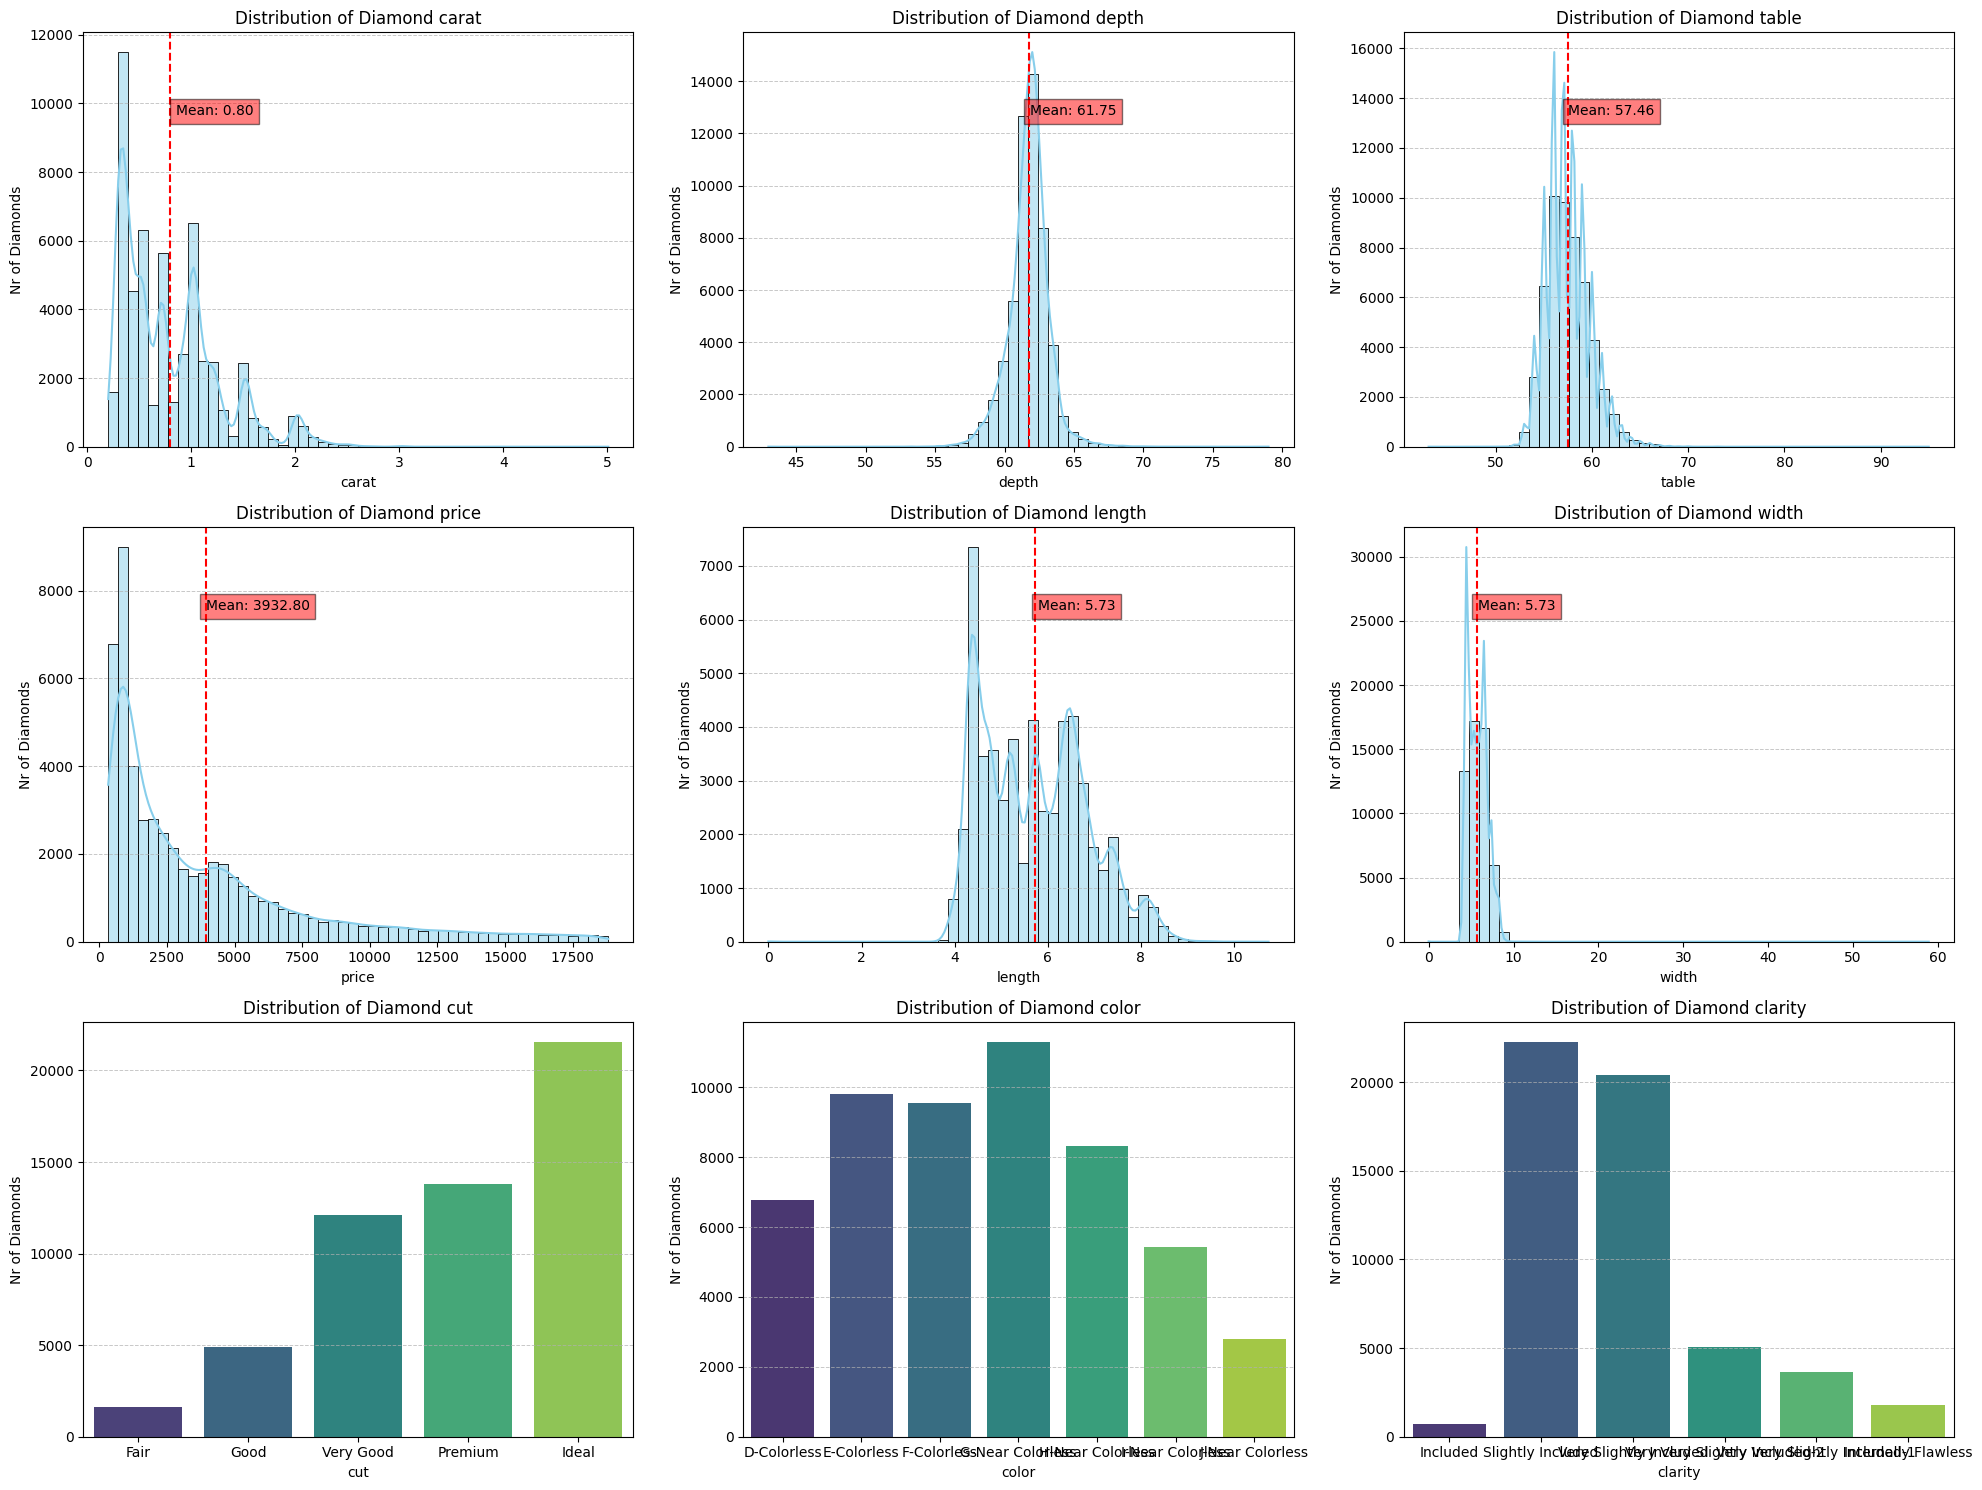

<Figure size 640x480 with 0 Axes>

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15)) 

# Flattening the array of axes for easy indexing
axes = axes.flatten()

numeric_feats = ['carat', 'depth', 'table', 'price', 'length', 'width']
category_feats = ['cut', 'color', 'clarity']

all_feats = numeric_feats + category_feats  # Merging both lists
#define cut order
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
#define color order
color_order = ['D-Colorless', 'E-Colorless', 'F-Colorless', 'G-Near Colorless', 'H-Near Colorless', 'I-Near Colorless', 'J-Near Colorless']
#define clarity order
clarity_order = ['Included', 'Slightly Included', 'Very Slightly Included', 'Very Very Slightly Included-2', 'Very Very Slightly Included-1', 'Internally Flawless']

# Looping through all features and plotting
for i, feature in enumerate(all_feats):
    ax = axes[i]
    
    if feature in numeric_feats:
        sns.histplot(diamonds[feature], bins=50, ax=ax, color='skyblue', kde=True)
        ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
        mean_val = diamonds[feature].mean()
        ax.axvline(mean_val, color='r', linestyle='--')
        ax.text(mean_val + 0.05, ax.get_ylim()[1] * 0.8, 'Mean: {:.2f}'.format(mean_val), bbox=dict(facecolor='red', alpha=0.5))
    else:
        #sorting the 'cut' feature by quality
        if feature == 'cut':
            sns.countplot(x=feature, data=diamonds, ax=ax, palette='viridis', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
            ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, which='major')
        #sorting the 'color' feature by quality
        elif feature == 'color':
            sns.countplot(x=feature, data=diamonds, ax=ax, palette='viridis', order=['D-Colorless', 'E-Colorless', 'F-Colorless', 'G-Near Colorless', 'H-Near Colorless', 'I-Near Colorless', 'J-Near Colorless'])
            ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, which='major')
        #sorting the 'clarity' feature by quality
        elif feature == 'clarity':
            sns.countplot(x=feature, data=diamonds, ax=ax, palette='viridis', order=['Included', 'Slightly Included', 'Very Slightly Included', 'Very Very Slightly Included-2', 'Very Very Slightly Included-1', 'Internally Flawless'])
            ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, which='major')
        else:
            sns.countplot(x=feature, data=diamonds, ax=ax, palette='viridis')
            ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, which='major')
        
    ax.set_xlabel(feature)
    ax.set_ylabel('Nr of Diamonds')
    ax.set_title(f'Distribution of Diamond {feature}')

plt.tight_layout() # Adjust the plots to avoid overlapping
plt.show() 
#remove empty plots
axes[-1].remove()
axes[-2].remove()
axes[-3].remove()

#add title
fig.suptitle('Distribution of Diamond Features', fontsize=16)

plt.tight_layout()
plt.show()